some experimenting with dask futures and dynamic updates as processes return

In [1]:
from dask.distributed import Client, as_completed
import numpy as np 
import matplotlib.pyplot as plt
import time 

%matplotlib notebook

client = Client()  # start local workers as processes

In [2]:
x = np.linspace(0, 1, 100)
y = np.zeros(x.shape)

def dy(timedelay):
    time.sleep(timedelay)
    return np.random.rand(x.shape[0])

<IPython.core.display.Javascript object>


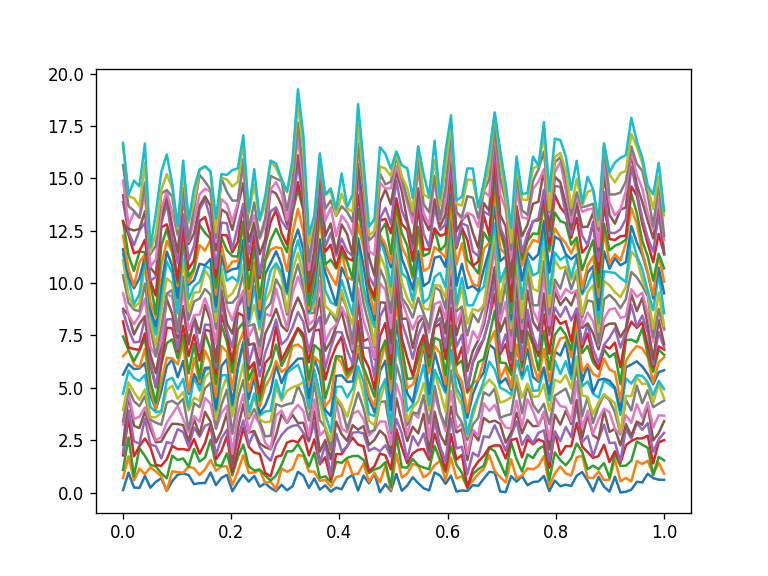

In [3]:
futures = client.map(dy, np.random.rand(30))
f, axs = plt.subplots(1)
for future in as_completed(futures):
   dyvals = future.result()
   y += dyvals 
   axs.plot(x, y)
   f.canvas.draw()

In [ ]:
a

In [ ]:
from dask.distributed import as_completed

futures = client.map(score, x_values)

best = -1
for future in as_completed(futures):
   y = future.result()
   if y > best:
       best = y


In [ ]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)